## Data for data filling test produced using this notebook

In [1]:
import numpy as np

%matplotlib inline
import sys

sys.path.append("..")
from solardatatools.data_filling import zero_nighttime, interp_missing
from solardatatools.plotting import plot_2d
from solardatatools.dataio import get_pvdaq_data
from solardatatools import DataHandler

In [2]:
df1 = get_pvdaq_data(sysid=1199, year=[2015, 2016, 2017], api_key="DEMO_KEY")

[============================================================] 100.0% ...queries complete in 18.0 seconds       



### Fixed timezone using DataHandler

In [4]:
dh = DataHandler(df1)
dh.fix_dst()

In [5]:
dh.run_pipeline(power_col="dc_power")


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list: 100%|██████████████████████████████████| 7/7 [00:12<00:00,  1.84s/it]



total time: 12.90 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.11s
Cleaning                   0.11s
Filtering/Summarizing      10.68s
    Data quality           0.07s
    Clear day detect       0.13s
    Clipping detect        4.70s
    Capacity change detect 5.79s



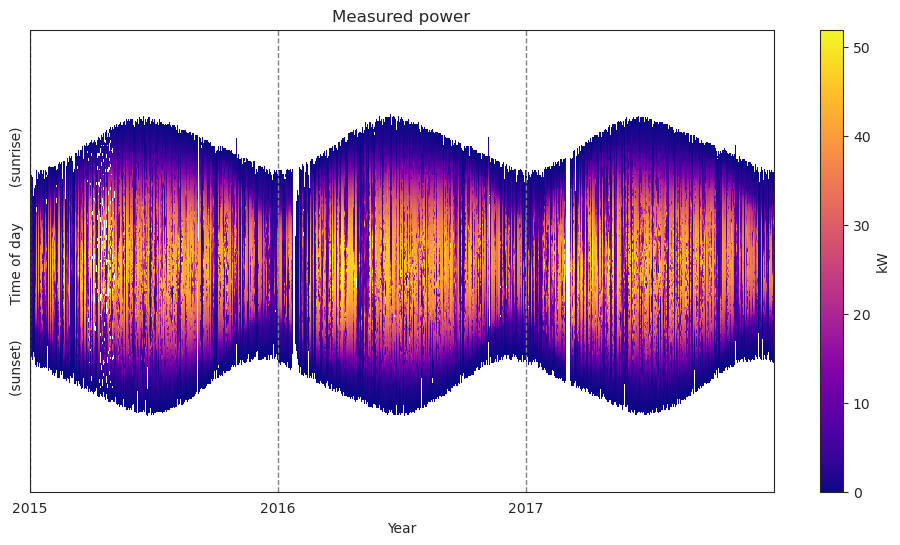

In [6]:
dh.plot_heatmap("raw");

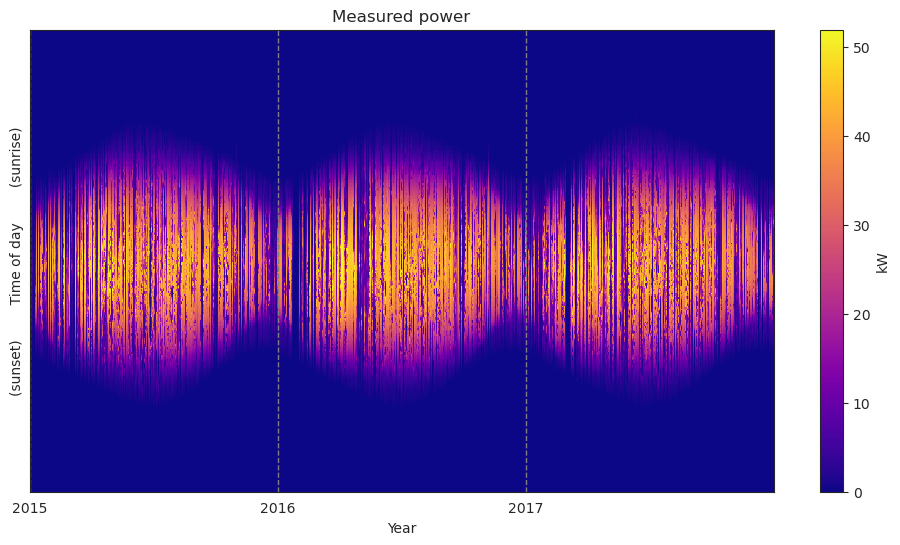

In [7]:
dh.plot_heatmap("filled");

### Data Input

In [8]:
data = dh.raw_data_matrix

### Select I/O file names

In [9]:
zero_nighttime_input_file_name = "pvdaq_2d_data_input.csv"
zero_nighttime_output_file_name = "expected_zero_nighttime_output.csv"
interp_missing_output_file_name = "expected_interp_missing_output.csv"

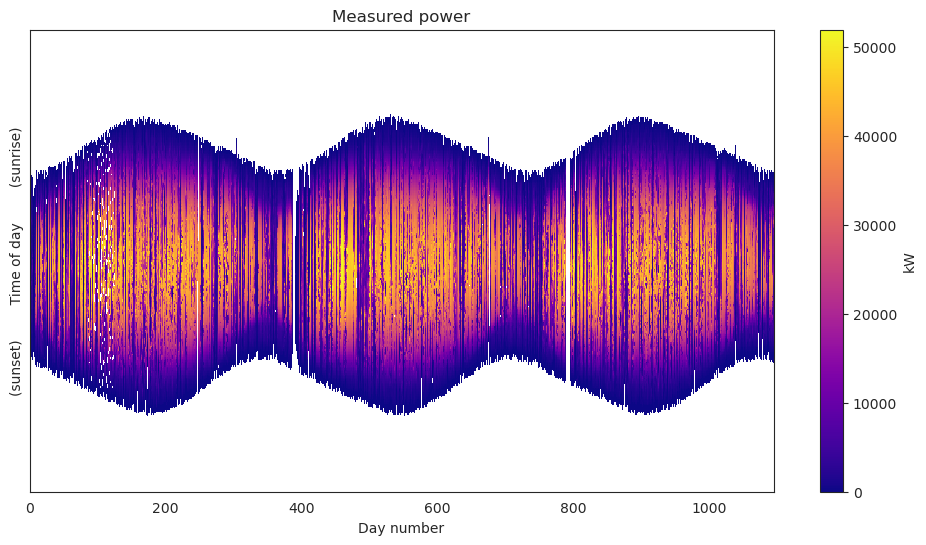

In [10]:
plot_2d(data);

### Save input data to csv

In [11]:
np.savetxt("./" + zero_nighttime_input_file_name, data, delimiter=",")

### Run functions

In [12]:
z = zero_nighttime(data)
i = interp_missing(z)

### Save expected output for zero_nighttime() to csv

In [13]:
np.savetxt("./" + zero_nighttime_output_file_name, z, delimiter=",")

### Save expected output for interp_missing() to csv

In [14]:
np.savetxt("./" + interp_missing_output_file_name, i, delimiter=",")

### Visual Test

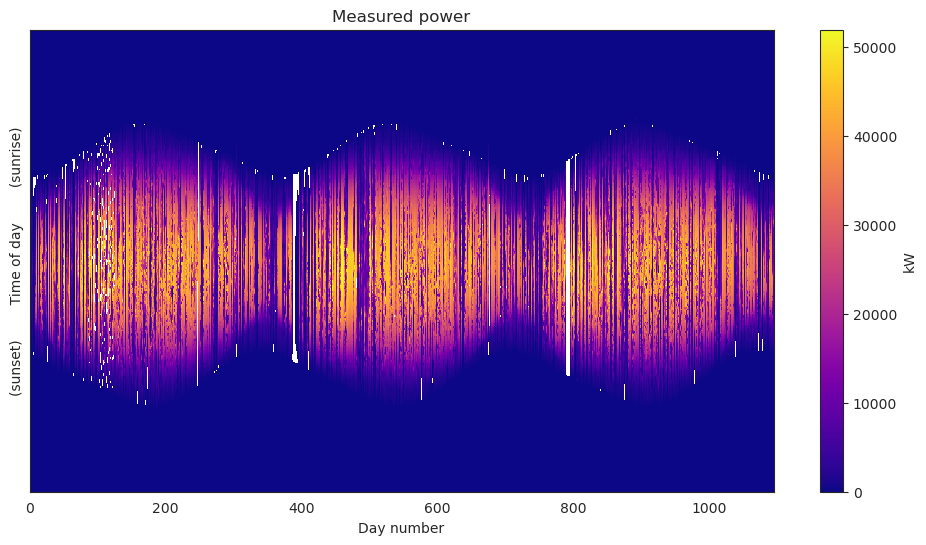

In [15]:
plot_2d(z);

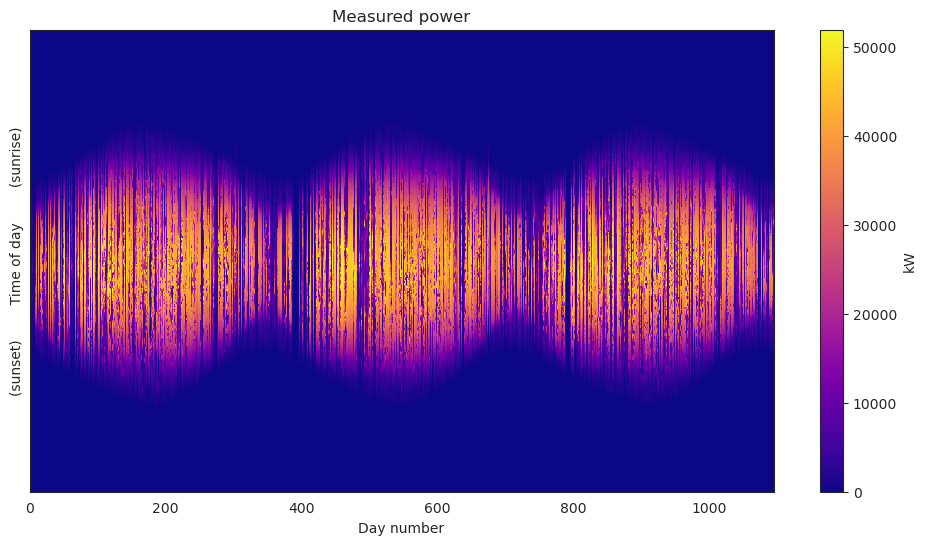

In [16]:
plot_2d(i);